In [9]:
import pandas as pd
import numpy as np

In [10]:
players = pd.read_csv("/content/players_22.csv")

/tmp/ipython-input-1534703861.py:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  players = pd.read_csv("/content/players_22.csv")


In [11]:
#Based on these features we gonna perform clustering

features = ["overall", "potential", "value_eur", "wage_eur", "age"]

In [12]:
players = players.dropna(subset=features)

In [13]:
data = players[features].copy()

In [14]:
data

,overall,potential,value_eur,wage_eur,age
0,93,93,78000000.0,320000.0,34
1,92,92,119500000.0,270000.0,32
2,91,91,45000000.0,270000.0,36
3,91,91,129000000.0,270000.0,29
4,91,91,125500000.0,350000.0,30
...,...,...,...,...,...
19234,47,52,70000.0,1000.0,22
19235,47,59,110000.0,500.0,19
19236,47,55,100000.0,500.0,21
19237,47,60,110000.0,500.0,19


In [15]:
data = (data-data.min()) / (data.max() - data.min()) * 9 + 1

In [16]:
data.describe()

,overall,potential,value_eur,wage_eur,age
count,19165.000000,19165.000000,19165.000000,19165.000000,19165.000000
mean,4.670472,5.319998,1.131826,1.219443,4.063345
std,1.346635,1.191076,0.353229,0.501528,1.575838
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.739130,4.521739,1.021620,1.012876,2.666667
50%,4.717391,5.304348,1.044817,1.064378,4.000000
75%,5.500000,6.086957,1.092370,1.193133,5.333333
max,10.000000,10.000000,10.000000,10.000000,10.000000


In [17]:
data.head()

,overall,potential,value_eur,wage_eur,age
0,10.000000,9.608696,4.618307,9.227468,7.000000
1,9.804348,9.413043,6.543654,7.939914,6.333333
2,9.608696,9.217391,3.087308,7.939914,7.666667
3,9.608696,9.217391,6.984396,7.939914,5.333333
4,9.608696,9.217391,6.822018,10.000000,5.666667


In [18]:
#Initializing random centroids
def random_centroids(data,k):
    centroids=[]
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [19]:
centroids = random_centroids(data,5)

/tmp/ipython-input-1652913307.py:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid = data.apply(lambda x: float(x.sample()))


In [20]:
centroids

,0,1,2,3,4
overall,1.586957,5.304348,2.760870,2.173913,4.326087
potential,4.913043,3.934783,4.717391,4.130435,6.673913
value_eur,1.110928,1.064534,1.014660,1.027419,1.009325
wage_eur,1.012876,1.012876,2.429185,1.038627,1.038627
age,5.666667,6.666667,3.000000,4.333333,6.666667


In [21]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [22]:
labels = get_labels(data, centroids)

In [23]:
labels.value_counts()

,count
2,7850
1,5506
4,3511
3,2293
0,5


In [24]:
#updating the centroids who is inside the cluster
def new_centroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids


In [25]:
# To plot the cluster assignments
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [26]:
#Plotting the clusters

def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2) # converts several columns to 2 columns
    data_2d = pca.fit_transform(data) # runs the model
    centroids_2d = pca.transform(centroids.T)#----upto here converting to 2d data
    clear_output(wait=True) # from here we are plotting the data
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

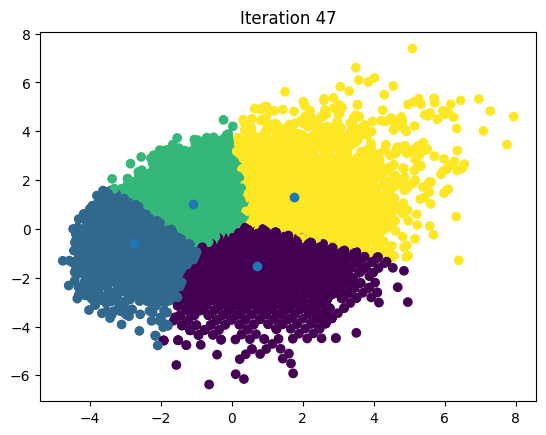

In [27]:
max_iterations = 100
centroid_count = 4

centroids = random_centroids(data, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids

    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, centroid_count)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1

In [28]:
centroids

,0,1,2,3
overall,4.642364,2.583541,4.311694,6.405155
potential,4.369041,4.283190,5.838660,6.512406
value_eur,1.035494,1.013460,1.062916,1.369797
wage_eur,1.088135,1.017366,1.074427,1.614006
age,5.435779,2.483590,2.700703,4.445231


In [29]:
players[labels == 0][["short_name"] + features]

,short_name,overall,potential,value_eur,wage_eur,age
1464,L. Jiménez,75,75,1800000.0,4000.0,37
1466,L. López,75,75,1900000.0,15000.0,38
1467,A. Pyatov,75,75,625000.0,500.0,37
1474,J. Corona,75,75,625000.0,23000.0,40
1480,R. Pasveer,75,75,625000.0,8000.0,37
...,...,...,...,...,...,...
18867,S. Ghosh,51,51,40000.0,500.0,29
18888,Liu Xinyu,51,51,60000.0,2000.0,29
18971,Lalkhawpuimawia,51,51,60000.0,500.0,29
19100,J. Russell,49,49,15000.0,500.0,36


In [30]:
players[labels == 1][["short_name"] + features]

,short_name,overall,potential,value_eur,wage_eur,age
11593,Raphael Doninho,64,64,700000.0,5000.0,21
12250,D. Ferdiz,63,63,500000.0,500.0,21
12643,B. Miranda,63,65,625000.0,500.0,23
12871,M. Collao,63,65,625000.0,900.0,23
13552,S. Matthews,62,66,575000.0,2000.0,24
...,...,...,...,...,...,...
19234,Song Defu,47,52,70000.0,1000.0,22
19235,C. Porter,47,59,110000.0,500.0,19
19236,N. Logue,47,55,100000.0,500.0,21
19237,L. Rudden,47,60,110000.0,500.0,19


In [31]:
players[labels == 2][["short_name"] + features]

,short_name,overall,potential,value_eur,wage_eur,age
2415,A. Aouchiche,74,82,9000000.0,9000.0,18
2866,Osvaldão Murilo,73,73,3100000.0,9000.0,21
2871,Nicolás Formido,73,73,3600000.0,16000.0,21
2877,Neviano Neves,73,73,3600000.0,17000.0,21
2884,Luis Couprins,73,73,3200000.0,9000.0,21
...,...,...,...,...,...,...
18124,M. Løvik,55,76,375000.0,500.0,17
18125,J. Hernández,55,77,400000.0,500.0,17
18227,K. Urbański,54,79,350000.0,550.0,16
18311,S. Denham,54,77,325000.0,500.0,18


In [32]:
from sklearn.cluster import KMeans

In [33]:
kmeans = KMeans(4)
kmeans.fit(data)

KMeans(n_clusters=4)

In [34]:
pd.DataFrame(kmeans.cluster_centers_, columns=features).T

,0,1,2,3
overall,4.728509,3.023109,4.856936,6.718099
potential,4.433304,4.693384,6.120295,6.653899
value_eur,1.036641,1.018738,1.097041,1.561255
wage_eur,1.097178,1.021624,1.139255,1.914588
age,5.576601,2.634442,3.036263,4.972324
